In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Basel-hava-durumu(2024-01-01-2025-03-18).csv")

In [3]:
df.head(10)

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5
0,lat,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000
1,lon,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000
2,asl,363.653,363.653,363.653,363.653,363.653,363.653
3,variable,Temperature,Precipitation Total,Relative Humidity,Wind Gust,Cloud Cover Total,Mean Sea Level Pressure
4,unit,°C,mm,%,km/h,%,hPa
5,level,2 m elevation corrected,sfc,2 m,sfc,sfc,MSL
6,resolution,hourly,hourly,hourly,hourly,hourly,hourly
7,aggregation,NaN,NaN,NaN,NaN,NaN,NaN
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Relative Humidity [2 m],Basel Wind Gust,Basel Cloud Cover Total,Basel Mean Sea Level Pressure [MSL]
9,20240101T0000,6.5302453,0.0,81.2849,34.56,73.0,1012.5


In [4]:
df = pd.read_csv("data/Basel-hava-durumu(2024-01-01-2025-03-18).csv",
                 skiprows=9,
                 names=["Tarih", "Sıcaklık (°C)", "Yağış (mm)", "Nem (%)", "Rüzgar Hızı (km/h)", "Bulut Örtüsü (%)", "Basınç (hPa)"],
                 header=0)

In [5]:
df.head()

,Tarih,Sıcaklık (°C),Yağış (mm),Nem (%),Rüzgar Hızı (km/h),Bulut Örtüsü (%),Basınç (hPa)
0,20240101T0000,6.530245,0.0,81.28490,34.560000,73.0,1012.5
1,20240101T0100,6.240245,0.0,83.22755,35.280000,73.0,1012.6
2,20240101T0200,6.210245,0.0,84.71120,41.039997,84.0,1013.0
3,20240101T0300,6.170245,0.1,84.94641,40.320000,74.0,1013.2
4,20240101T0400,6.160245,0.0,83.80913,36.719997,50.0,1013.3


In [6]:
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%Y%m%dT%H%M")

In [7]:
df.head()

,Tarih,Sıcaklık (°C),Yağış (mm),Nem (%),Rüzgar Hızı (km/h),Bulut Örtüsü (%),Basınç (hPa)
0,2024-01-01 00:00:00,6.530245,0.0,81.28490,34.560000,73.0,1012.5
1,2024-01-01 01:00:00,6.240245,0.0,83.22755,35.280000,73.0,1012.6
2,2024-01-01 02:00:00,6.210245,0.0,84.71120,41.039997,84.0,1013.0
3,2024-01-01 03:00:00,6.170245,0.1,84.94641,40.320000,74.0,1013.2
4,2024-01-01 04:00:00,6.160245,0.0,83.80913,36.719997,50.0,1013.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tarih               10632 non-null  datetime64[ns]
 1   Sıcaklık (°C)       10392 non-null  float64       
 2   Yağış (mm)          10392 non-null  float64       
 3   Nem (%)             10392 non-null  float64       
 4   Rüzgar Hızı (km/h)  10392 non-null  float64       
 5   Bulut Örtüsü (%)    10392 non-null  float64       
 6   Basınç (hPa)        10392 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 581.6 KB


In [9]:
df.isnull().sum()

Tarih                   0
Sıcaklık (°C)         240
Yağış (mm)            240
Nem (%)               240
Rüzgar Hızı (km/h)    240
Bulut Örtüsü (%)      240
Basınç (hPa)          240
dtype: int64

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tarih               10392 non-null  datetime64[ns]
 1   Sıcaklık (°C)       10392 non-null  float64       
 2   Yağış (mm)          10392 non-null  float64       
 3   Nem (%)             10392 non-null  float64       
 4   Rüzgar Hızı (km/h)  10392 non-null  float64       
 5   Bulut Örtüsü (%)    10392 non-null  float64       
 6   Basınç (hPa)        10392 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 568.4 KB


In [12]:
df.describe()

,Tarih,Sıcaklık (°C),Yağış (mm),Nem (%),Rüzgar Hızı (km/h),Bulut Örtüsü (%),Basınç (hPa)
count,10392,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000
mean,2024-08-04 12:29:51.685912320,11.017059,0.109834,80.985799,19.689526,50.990926,1017.839665
min,2024-01-01 00:00:00,-7.269755,0.000000,27.732483,4.320000,0.000000,984.100000
25%,2024-04-18 05:45:00,5.320245,0.000000,73.980745,12.240000,22.800001,1012.400000
50%,2024-08-04 11:30:00,10.290245,0.000000,85.101890,16.199999,47.000000,1017.500000
75%,2024-11-20 17:15:00,16.320246,0.000000,91.284395,23.759998,85.000000,1024.300000
max,2025-03-10 23:00:00,34.770250,8.100000,99.852790,82.799995,100.000000,1041.100000
std,NaN,7.790093,0.332648,13.778226,10.935327,33.599673,9.398363


In [13]:
en_sicak_gun = df.loc[df["Sıcaklık (°C)"].idxmax()]
en_sicak_gun

Tarih                 2024-08-24 15:00:00
Sıcaklık (°C)                    34.77025
Yağış (mm)                            0.0
Nem (%)                         28.998682
Rüzgar Hızı (km/h)              38.519997
Bulut Örtüsü (%)                      1.5
Basınç (hPa)                       1009.2
Name: 5679, dtype: object

In [14]:
en_soguk_gun = df.loc[df["Sıcaklık (°C)"].idxmin()]
en_soguk_gun

Tarih                 2024-01-13 09:00:00
Sıcaklık (°C)                   -7.269755
Yağış (mm)                            0.0
Nem (%)                          93.67189
Rüzgar Hızı (km/h)              13.679999
Bulut Örtüsü (%)                     27.0
Basınç (hPa)                       1028.8
Name: 297, dtype: object

In [15]:
en_cok_yagis = df.loc[df["Yağış (mm)"].idxmax()]
en_cok_yagis

Tarih                 2024-06-29 23:00:00
Sıcaklık (°C)                   20.170246
Yağış (mm)                            8.1
Nem (%)                          92.84019
Rüzgar Hızı (km/h)                  51.12
Bulut Örtüsü (%)                     81.0
Basınç (hPa)                       1009.7
Name: 4343, dtype: object

In [16]:
en_ruzgarlı_gun = df.loc[df["Rüzgar Hızı (km/h)"].idxmax()]
en_ruzgarlı_gun

Tarih                 2024-11-19 21:00:00
Sıcaklık (°C)                   10.990245
Yağış (mm)                            2.3
Nem (%)                          83.96138
Rüzgar Hızı (km/h)              82.799995
Bulut Örtüsü (%)                     99.0
Basınç (hPa)                        994.4
Name: 7773, dtype: object

In [17]:
df["Ay"] = df["Tarih"].dt.month

In [18]:
aylik_sicaklik = df.groupby("Ay")["Sıcaklık (°C)"].mean()
aylik_sicaklik

Ay
1      3.466650
2      5.995082
3      8.521599
4     10.950259
5     15.076253
6     18.773315
7     20.856428
8     22.272853
9     15.908565
10    13.016522
11     6.377037
12     3.571186
Name: Sıcaklık (°C), dtype: float64

In [19]:
aylik_yagis = df.groupby("Ay")["Yağış (mm)"].sum()
aylik_yagis

Ay
1     191.6
2      93.9
3      83.3
4      81.3
5     147.9
6     129.3
7      62.9
8      41.7
9      81.3
10     77.2
11     77.0
12     74.0
Name: Yağış (mm), dtype: float64

In [20]:
df["Gün"] = df["Tarih"].dt.date

In [21]:
gunluk_sicaklik_farki = df.groupby("Gün")["Sıcaklık (°C)"].agg(["max", "min"])
gunluk_sicaklik_farki["Fark"] = gunluk_sicaklik_farki["max"] - gunluk_sicaklik_farki["min"]
gunluk_sicaklik_farki.sort_values("Fark", ascending=False).head(10)

,max,min,Fark
Gün,,,
2024-04-13,26.440245,6.960245,19.480000
2024-08-24,34.770250,15.310246,19.460004
2024-04-06,27.600245,9.480246,18.119999
2024-04-12,21.860245,4.070245,17.790000
2024-05-11,25.480246,7.730245,17.750001
2025-03-05,17.030245,-0.669755,17.700000
2024-05-10,23.770245,6.320245,17.450000
2024-08-23,29.530245,12.120245,17.410000
2024-07-09,32.520245,15.260245,17.260000


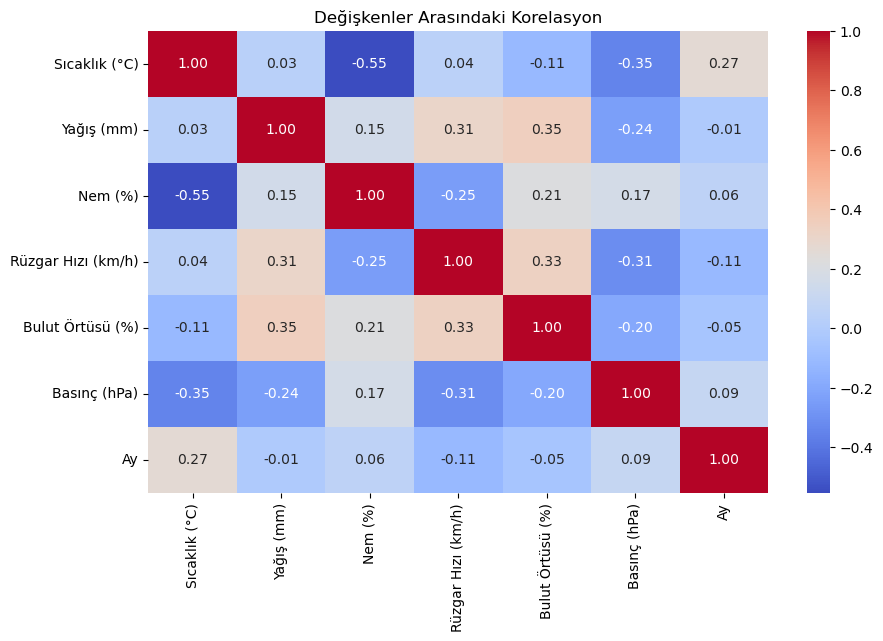

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon")
plt.show()

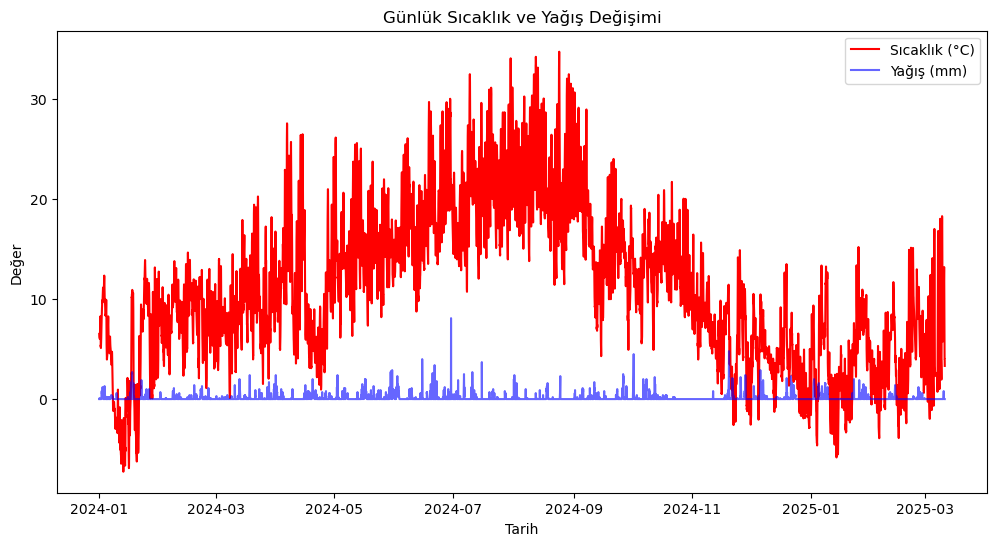

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df["Tarih"], df["Sıcaklık (°C)"], label="Sıcaklık (°C)", color="red")
plt.plot(df["Tarih"], df["Yağış (mm)"], label="Yağış (mm)", color="blue", alpha=0.6)
plt.xlabel("Tarih")
plt.ylabel("Değer")
plt.title("Günlük Sıcaklık ve Yağış Değişimi")
plt.legend()
plt.show()

In [24]:
extrem_gunler = df[(df["Sıcaklık (°C)"] > 30) | (df["Rüzgar Hızı (km/h)"] > 50)]
extrem_gunler

,Tarih,Sıcaklık (°C),Yağış (mm),Nem (%),Rüzgar Hızı (km/h),Bulut Örtüsü (%),Basınç (hPa),Ay,Gün
29,2024-01-02 05:00:00,7.960245,0.8,82.068115,51.480000,100.0,1009.5,1,2024-01-02
30,2024-01-02 06:00:00,8.350245,0.8,82.065636,54.360000,98.0,1009.0,1,2024-01-02
31,2024-01-02 07:00:00,8.590245,0.5,81.813600,55.440000,97.0,1008.9,1,2024-01-02
32,2024-01-02 08:00:00,8.820246,0.5,82.017204,56.160000,96.0,1008.9,1,2024-01-02
33,2024-01-02 09:00:00,9.110246,0.5,81.716576,56.160000,98.0,1009.0,1,2024-01-02
...,...,...,...,...,...,...,...,...,...
10104,2025-02-26 00:00:00,6.280245,0.3,79.134700,54.360000,95.0,1015.9,2,2025-02-26
10105,2025-02-26 01:00:00,5.820245,0.4,80.889336,54.719997,98.0,1016.6,2,2025-02-26
10106,2025-02-26 02:00:00,5.240245,0.5,83.447050,54.000000,97.0,1017.1,2,2025-02-26
10107,2025-02-26 03:00:00,4.880245,0.7,84.904530,53.639996,100.0,1017.8,2,2025-02-26
